# Sensitivity Analysis

In [1]:
import pandas as pd
from Data.Featurisation import data_handeler
from Models.models import source, target
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
from scale import Scale
from hyperparameters.hyperparameters import hyperparameters_source, hyperparameters_target
import torch
import warnings
import numpy as np
from sklearn.svm import SVR


## Physics-informed measures
- is_day
- PoA, T_PV
- inverter limit
- decomposition

### Calclations

IS DAY

In [13]:
my_index = pd.MultiIndex.from_product([range(7), range(13)])
rmse = pd.DataFrame(index=my_index, columns=range(4))
sites = range(4)
model = 1

In [15]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', HP_tuning=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(0, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([841, 24, 7]) torch.Size([210, 24, 7]) torch.Size([841, 24, 1]) torch.Size([210, 24, 1])
Step 0: Average train loss: 0.0505 | Average test loss: 0.0386
Step 5: Average train loss: 0.0131 | Average test loss: 0.0099
Step 10: Average train loss: 0.0117 | Average test loss: 0.0095
Step 15: Average train loss: 0.0111 | Average test loss: 0.0090
Step 20: Average train loss: 0.0108 | Average test loss: 0.0089
Step 25: Average train loss: 0.0106 | Average test loss: 0.0088
Step 30: Average train loss: 0.0105 | Average test loss: 0.0087
Step 35: Average train loss: 0.0104 | Average test loss: 0.0087
Step 40: Average train loss: 0.0103 | Average test loss: 0.0086
Step 45: Average train loss: 0.0101 | Average test loss: 0.0087
Step 50: Average train loss: 0.0099 | Average test loss: 0.0085
Step 55: Average train loss: 0.0096 | Average test loss: 0.0083
Step 60: Average train loss: 0.0102 | Average test loss: 0.0096
Step 65: Av

KeyboardInterrupt: 

In [5]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(1, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 6]) torch.Size([140, 24, 6]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0581 | Average test loss: 0.0352
Step 5: Average train loss: 0.0281 | Average test loss: 0.0189
Step 10: Average train loss: 0.0129 | Average test loss: 0.0128
Step 15: Average train loss: 0.0119 | Average test loss: 0.0108
Step 20: Average train loss: 0.0111 | Average test loss: 0.0101
Step 25: Average train loss: 0.0107 | Average test loss: 0.0104
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0104 | Average test loss: 0.0101
Step 40: Average train loss: 0.0103 | Average test loss: 0.0100
Step 45: Average train loss: 0.0101 | Average test loss: 0.0096
Step 50: Average train loss: 0.0100 | Average test loss: 0.0093
Step 55: Average train loss: 0.0099 | Average test loss: 0.0094
Step 60: Average train loss: 0.0096 | Average test loss: 0.0089
Step 65: Av

PoA and T_PV

In [6]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp');
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);

    rmse.loc[(2, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 6]) torch.Size([140, 24, 6]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0502 | Average test loss: 0.0360
Step 5: Average train loss: 0.0167 | Average test loss: 0.0148
Step 10: Average train loss: 0.0121 | Average test loss: 0.0105
Step 15: Average train loss: 0.0112 | Average test loss: 0.0110
Step 20: Average train loss: 0.0109 | Average test loss: 0.0111
Step 25: Average train loss: 0.0106 | Average test loss: 0.0106
Step 30: Average train loss: 0.0105 | Average test loss: 0.0104
Step 35: Average train loss: 0.0104 | Average test loss: 0.0103
Step 40: Average train loss: 0.0103 | Average test loss: 0.0102
Step 45: Average train loss: 0.0103 | Average test loss: 0.0100
Step 50: Average train loss: 0.0102 | Average test loss: 0.0100
Step 55: Average train loss: 0.0102 | Average test loss: 0.0100
Step 60: Average train loss: 0.0099 | Average test loss: 0.0103
Step 65: Av

In [7]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(3, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 7]) torch.Size([140, 24, 7]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0582 | Average test loss: 0.0355
Step 5: Average train loss: 0.0167 | Average test loss: 0.0139
Step 10: Average train loss: 0.0135 | Average test loss: 0.0101
Step 15: Average train loss: 0.0111 | Average test loss: 0.0105
Step 20: Average train loss: 0.0108 | Average test loss: 0.0105
Step 25: Average train loss: 0.0106 | Average test loss: 0.0105
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0104 | Average test loss: 0.0101
Step 40: Average train loss: 0.0103 | Average test loss: 0.0100
Step 45: Average train loss: 0.0103 | Average test loss: 0.0099
Step 50: Average train loss: 0.0102 | Average test loss: 0.0098
Step 55: Average train loss: 0.0100 | Average test loss: 0.0095
Step 60: Average train loss: 0.0098 | Average test loss: 0.0096
Step 65: Av

Inverter Limit

In [8]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=False);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(4, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 8]) torch.Size([140, 24, 8]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0525 | Average test loss: 0.0359
Step 5: Average train loss: 0.0145 | Average test loss: 0.0132
Step 10: Average train loss: 0.0127 | Average test loss: 0.0122
Step 15: Average train loss: 0.0112 | Average test loss: 0.0106
Step 20: Average train loss: 0.0109 | Average test loss: 0.0108
Step 25: Average train loss: 0.0107 | Average test loss: 0.0107
Step 30: Average train loss: 0.0105 | Average test loss: 0.0103
Step 35: Average train loss: 0.0103 | Average test loss: 0.0101
Step 40: Average train loss: 0.0102 | Average test loss: 0.0100
Step 45: Average train loss: 0.0102 | Average test loss: 0.0098
Step 50: Average train loss: 0.0100 | Average test loss: 0.0095
Step 55: Average train loss: 0.0098 | Average test loss: 0.0095
Step 60: Average train loss: 0.0096 | Average test loss: 0.0089
Step 65: Av

In [9]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', inv_limit=True);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    features.remove('is_day')
    features.remove('PoA')
    features.remove('T_PV')
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(5, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 5]) torch.Size([140, 24, 5]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0562 | Average test loss: 0.0354
Step 5: Average train loss: 0.0153 | Average test loss: 0.0137
Step 10: Average train loss: 0.0125 | Average test loss: 0.0130
Step 15: Average train loss: 0.0114 | Average test loss: 0.0112
Step 20: Average train loss: 0.0109 | Average test loss: 0.0108
Step 25: Average train loss: 0.0108 | Average test loss: 0.0108
Step 30: Average train loss: 0.0105 | Average test loss: 0.0104
Step 35: Average train loss: 0.0105 | Average test loss: 0.0104
Step 40: Average train loss: 0.0104 | Average test loss: 0.0103
Step 45: Average train loss: 0.0104 | Average test loss: 0.0103
Step 50: Average train loss: 0.0103 | Average test loss: 0.0102
Step 55: Average train loss: 0.0103 | Average test loss: 0.0102
Step 60: Average train loss: 0.0102 | Average test loss: 0.0100
Step 65: Av

Decomposition

In [10]:
warnings. filterwarnings('ignore') 
for site in sites:
    dataset_name = "nwp"
    phys=True
    source_data, _, eval_data = data_handeler(site, 'nwp', 'nwp', 'nwp', decomp=True);
    ftr_file='features/ft_phys.pkl'


    with open(ftr_file, 'rb') as f:
        features = pickle.load(f)
    scale = Scale()
    scale.load(site, dataset_name, phys)

    hp = hyperparameters_source()
    hp.load(model)


    accuracy, state_dict, timer = source(source_data, features, hp, scale);

    hp = hyperparameters_target()
    hp.load(model)
    hp.source_state_dict = state_dict
    accur, timer, forecasts = target(eval_data, features, hp, scale, WFE = True);
    rmse.loc[(6, slice(len(accur)-1)),site] = accur

Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([558, 24, 8]) torch.Size([140, 24, 8]) torch.Size([558, 24, 1]) torch.Size([140, 24, 1])
Step 0: Average train loss: 0.0549 | Average test loss: 0.0359
Step 5: Average train loss: 0.0318 | Average test loss: 0.0241
Step 10: Average train loss: 0.0121 | Average test loss: 0.0103
Step 15: Average train loss: 0.0110 | Average test loss: 0.0101
Step 20: Average train loss: 0.0107 | Average test loss: 0.0104
Step 25: Average train loss: 0.0105 | Average test loss: 0.0105
Step 30: Average train loss: 0.0103 | Average test loss: 0.0103
Step 35: Average train loss: 0.0102 | Average test loss: 0.0100
Step 40: Average train loss: 0.0100 | Average test loss: 0.0097
Step 45: Average train loss: 0.0096 | Average test loss: 0.0094
Step 50: Average train loss: 0.0096 | Average test loss: 0.0093
Step 55: Average train loss: 0.0096 | Average test loss: 0.0092
Step 60: Average train loss: 0.0096 | Average test loss: 0.0099
Step 65: Av

### Results

In [11]:
rmse

,0,1,2,3
0,208.705463,174.537122,558.925574,193.606811
1,210.809443,177.056246,558.312261,196.365235
2,209.488528,172.579986,559.99105,186.733048
3,211.101287,175.709857,559.065218,195.548412
4,209.350613,175.752439,559.697938,205.044143
5,212.177251,177.836177,557.451531,184.878216
6,209.517709,177.757179,560.52506,192.584326


## Number of features

### Non-physics-informed

Use the Random Forest to determine importances of all features and then put the; in this order of importance

In [7]:


installation_int = 0
source_data,_,_ = data_handeler(installation_int, "nwp", "nwp", "nwp")
# Labels are the values we want to predict
labels = np.array(source_data['P'])
# Remove the labels from the source_data
# axis 1 refers to the columns
source_data= source_data.drop('P', axis = 1)
# Saving feature names for later use
ftr_file = "features/ft_no_phys_sa.pkl"
if os.path.isfile(ftr_file):
    with open(ftr_file, 'rb') as f:
        feature_list = pickle.load(f)
# Convert to numpy array
source_data = source_data[feature_list]
source_data = np.array(source_data)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
# Print out rmse
print(errors, 'W')
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Not in Colab environment: Using .pkl files
Training Features Shape: (12582, 13)
Training Labels Shape: (12582,)
Testing Features Shape: (4194, 13)
Testing Labels Shape: (4194,)
238.62298480319606 W
Variable: downward_surface_SW_flux Importance: 0.81
Variable: P_24h_shift          Importance: 0.03
Variable: direct_surface_SW_flux Importance: 0.03
Variable: hour_cos             Importance: 0.03
Variable: diffuse_surface_SW_flux Importance: 0.02
Variable: relative_humidity_1_5m Importance: 0.02
Variable: temperature_1_5m     Importance: 0.02
Variable: wind_speed_10m       Importance: 0.02
Variable: pressure_MSL         Importance: 0.02
Variable: hour_sin             Importance: 0.01
Variable: month_cos            Importance: 0.01
Variable: total_cloud_amount   Importance: 0.01
Variable: month_sin            Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

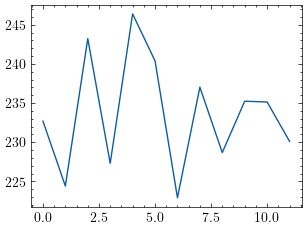

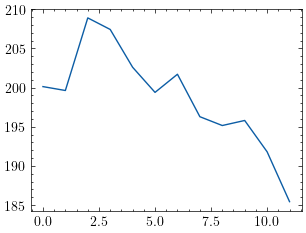

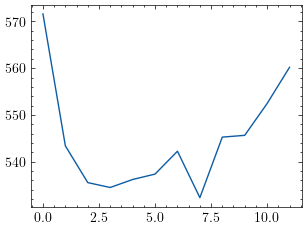

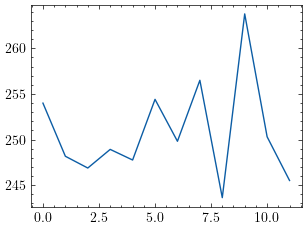

In [8]:
rmse_np = pd.read_pickle("sensitivity_analysis/nb_features/rmse_no_physics.pkl")
zs_rmse_np = rmse_np.loc[(slice(None), 0),:]
zs_rmse_np = zs_rmse_np.droplevel(1)
for site in range(4):
    plt.figure()
    plt.plot(zs_rmse_np[site])
    plt.show()

### Physics-informed

In [19]:
installation_int = 0
source_data,_,_ = data_handeler(installation_int, "nwp", "nwp", "nwp")
# Labels are the values we want to predict
labels = np.array(source_data['P'])
# Remove the labels from the source_data
# axis 1 refers to the columns
source_data= source_data.drop('P', axis = 1)
# Saving feature names for later use
ftr_file = "features/ft_phys_sa.pkl"
if os.path.isfile(ftr_file):
    with open(ftr_file, 'rb') as f:
        feature_list = pickle.load(f)
# Convert to numpy array
source_data = source_data[feature_list]
source_data = np.array(source_data)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
# Print out rmse
print(errors, 'W')
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Not in Colab environment: Using .pkl files
Training Features Shape: (12582, 16)
Training Labels Shape: (12582,)
Testing Features Shape: (4194, 16)
Testing Labels Shape: (4194,)
241.21926501974775 W
Variable: PoA                  Importance: 0.81
Variable: P_24h_shift          Importance: 0.03
Variable: downward_surface_SW_flux Importance: 0.03
Variable: diffuse_surface_SW_flux Importance: 0.02
Variable: T_PV                 Importance: 0.02
Variable: wind_speed_10m       Importance: 0.02
Variable: relative_humidity_1_5m Importance: 0.01
Variable: direct_surface_SW_flux Importance: 0.01
Variable: month_sin            Importance: 0.01
Variable: hour_sin             Importance: 0.01
Variable: temperature_1_5m     Importance: 0.01
Variable: pressure_MSL         Importance: 0.01
Variable: is_day               Importance: 0.0
Variable: month_cos            Importance: 0.0
Variable: hour_cos             Importance: 0.0
Variable: total_cloud_amount   Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

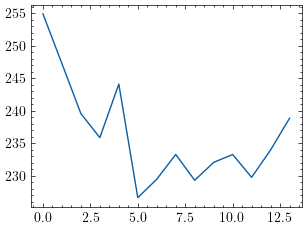

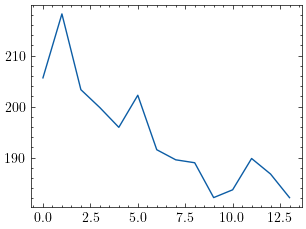

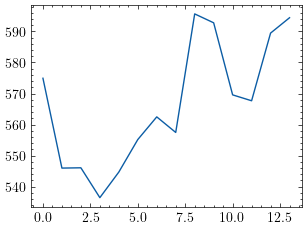

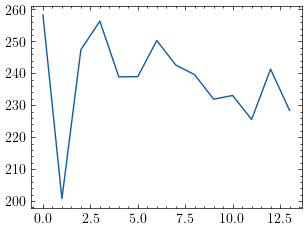

In [9]:
rmse_p = pd.read_pickle("sensitivity_analysis/nb_features/rmse_physics.pkl")
zs_rmse_p = rmse_p.loc[(slice(None), 0),:]
zs_rmse_p = zs_rmse_p.droplevel(1)
for site in range(4):
    plt.figure()
    plt.plot(zs_rmse_p[site])
    plt.show()

## Other ML models

- SVM
- RF
- biLSTM
- seq2seq LSTM

### RF

In [34]:
rmse_rf = pd.DataFrame(index=range(4), columns=(range(4)))

for site in range(4):
    for model in range(4): #Only treat nwp vs reanalysis and physics vs non-physics
        if model in [0,2]:
            phys=False
            phys_str = "no_phys.pkl"
        else:
            phys=True
            phys_str = "phys.pkl"
        if model in [0,1]:
            dataset_name = "nwp"
        else:
            dataset_name="era5"
        source_data,_,eval_data = data_handeler(site, dataset_name, "nwp", "nwp", phys)
        # Labels are the values we want to predict
        labels = np.array(source_data['P'])
        # Remove the labels from the source_data
        # axis 1 refers to the columns
        source_data= source_data.drop('P', axis = 1)
        # Saving feature names for later use
        ftr_file = "features/ft_" + phys_str
        if os.path.isfile(ftr_file):
            with open(ftr_file, 'rb') as f:
                feature_list = pickle.load(f)
        # Convert to numpy array
        source_data = source_data[feature_list]
        print(source_data)
        source_data = np.array(source_data)

        # Split the data into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
        #Instantiate model with 1000 decision trees
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # Train the model on training data
        rf.fit(train_features, train_labels)

        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
        # Print out rmse
        print("Test Error: ", errors, 'W')


        # Use the forest's predict method on the test data
        val_labels = eval_data['P'].iloc[24:31*24]
        val_features = eval_data[feature_list].iloc[24:31*24]
        forecasts = rf.predict(val_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(forecasts - val_labels)))
        # Print out rmse
        print("Zero-shot RMSE: ", errors, 'W')
        rmse_rf.loc[model, site] = errors


Not in Colab environment: Using .pkl files
                           temperature_1_5m  relative_humidity_1_5m  \
2017-05-01 00:00:00+00:00        285.791138               49.130329   
2017-05-01 01:00:00+00:00        285.791138               49.130329   
2017-05-01 02:00:00+00:00        284.749817               53.405571   
2017-05-01 03:00:00+00:00        284.716705               56.041130   
2017-05-01 04:00:00+00:00        284.208313               76.047226   
...                                     ...                     ...   
2019-04-30 19:00:00+00:00        284.337646               81.713089   
2019-04-30 20:00:00+00:00        284.214355               81.506241   
2019-04-30 21:00:00+00:00        283.925049               82.345413   
2019-04-30 22:00:00+00:00        283.625977               83.327530   
2019-04-30 23:00:00+00:00        283.157715               87.310318   

                           diffuse_surface_SW_flux  direct_surface_SW_flux  \
2017-05-01 00:00:00+00:00 

In [35]:
rmse_rf

,0,1,2,3
0,250.973958,239.166421,566.01265,238.382877
1,238.84915,214.461545,563.684135,238.95605
2,304.382634,265.277743,644.63406,231.451801
3,267.782638,224.991525,644.403521,215.760837


In [10]:
rmse_svm = pd.DataFrame(index=range(4), columns=(range(4)))

for site in range(4):
    for model in range(4): #Only treat nwp vs reanalysis and physics vs non-physics
        if model in [0,2]:
            phys=False
            phys_str = "no_phys.pkl"
        else:
            phys=True
            phys_str = "phys.pkl"
        if model in [0,1]:
            dataset_name = "nwp"
        else:
            dataset_name="era5"
        source_data,_,eval_data = data_handeler(site, dataset_name, "nwp", "nwp", phys)

        #Scale data (necessary for SVR)
        scale = Scale()
        scale.load(site, dataset_name, phys)
        max = scale.max
        min = scale.min
        for covar in source_data.columns:
            source_data[covar] = (source_data[covar]-min[covar])/(max[covar]-min[covar])
            eval_data[covar] = (eval_data[covar]-min[covar])/(max[covar]-min[covar])

        # Labels are the values we want to predict
        labels = np.array(source_data['P'])
        # Remove the labels from the source_data
        # axis 1 refers to the columns
        source_data= source_data.drop('P', axis = 1)
        # Saving feature names for later use
        ftr_file = "features/ft_" + phys_str
        if os.path.isfile(ftr_file):
            with open(ftr_file, 'rb') as f:
                feature_list = pickle.load(f)
        # Convert to numpy array
        source_data = source_data[feature_list]
        source_data = np.array(source_data)


        # Split the data into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(source_data, labels, test_size = 0.25, random_state = 42)

        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
        



        #Instantiate model SVR
        rf = SVR(kernel='linear')
        # Train the model on training data
        rf.fit(train_features, train_labels)

        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(predictions - test_labels)))
        # Print out rmse
        print("Test Error: ", errors, 'W')


        # Use the forest's predict method on the test data
        val_labels = eval_data['P'].iloc[24:31*24]
        val_features = eval_data[feature_list].iloc[24:31*24]
        forecasts = rf.predict(val_features)
        # Calculate the absolute errors
        errors = np.sqrt(np.mean(np.square(forecasts - val_labels)))
        # Print out rmse
        print("Zero-shot RMSE: ", errors*(max['P']-min['P']), 'W')
        rmse_svm.loc[model, site] = errors*(max['P']-min['P'])

Not in Colab environment: Using .pkl files


TypeError: unsupported operand type(s) for -: 'float' and 'dict'

In [38]:
rmse_svm

,0,1,2,3
0,284.358394,257.183519,580.511709,225.216348
1,259.125937,214.906515,575.809448,257.101905
2,329.983429,269.719089,650.041726,234.422344
3,293.571108,242.772438,626.608246,223.231431


## Nb of source years open-meteo

### Physics-informed

In [6]:
pd.read


Not in Colab environment: Using .pkl files
Shape of data:  torch.Size([1114, 24, 8]) torch.Size([278, 24, 8]) torch.Size([1114, 24, 1]) torch.Size([278, 24, 1])
Step 0: Average train loss: 0.1044 | Average test loss: 0.0305
Step 5: Average train loss: 0.0168 | Average test loss: 0.0121
Step 10: Average train loss: 0.0115 | Average test loss: 0.0110
Step 15: Average train loss: 0.0114 | Average test loss: 0.0108
Step 20: Average train loss: 0.0121 | Average test loss: 0.0116
Step 25: Average train loss: 0.0104 | Average test loss: 0.0099
Step 30: Average train loss: 0.0108 | Average test loss: 0.0098
Step 35: Average train loss: 0.0098 | Average test loss: 0.0105
Step 40: Average train loss: 0.0103 | Average test loss: 0.0111
Step 45: Average train loss: 0.0095 | Average test loss: 0.0102
Step 50: Average train loss: 0.0095 | Average test loss: 0.0097
Step 55: Average train loss: 0.0095 | Average test loss: 0.0097
Step 60: Average train loss: 0.0094 | Average test loss: 0.0096
Step 65: 

KeyboardInterrupt: 

In [ ]:
33